HW1 - Decision Tree

本次作業為預測角色是否死亡 (繳交期限：10/15 23:55)

資料集在以下網址:

https://www.kaggle.com/mylesoneill/game-of-thrones

其中第二份資料的character-deaths.csv

其中三個欄位 Death Year , Book of Death , Death Chapter 取其中一個欄位當預測目標用即可

請將欄位的空值轉成0(代表存活)，有數值的轉成1(代表死亡)


作業流程&要求 ※請使用python處理，可以使用任何套件

1)將資料讀取進來(可用pandas套件)

2)資料前處理

 2-1把空值以0替代

 2-2Death Year , Book of Death , Death Chapter三者取一個，將有數值的轉成1

 2-3將Allegiances轉成dummy特徵(底下有幾種分類就會變成幾個特徵，值是0或1，本來的資料集就會再增加約20種特徵)

 2-4亂數拆成訓練集(75%)與測試集(25%) 

3)使用scikit-learn的DecisionTreeClassifier進行預測(可以先試著將網頁範例(iris)跑出來在使用這次作業的資料集)

4)做出Confusion Matrix，並計算Precision, Recall, Accuracy (提示: 可使用sklearn.metrics)

5)產出決策樹的圖

  p.s 記得限制樹的深度，以免結果無法顯示

 

請將(4)(5)的結果截圖上傳(word 或 PDF)，並上傳python程式碼。

可以嘗試改善資料前處理部分&調整決策樹參數以增加Accuracy
 

要上傳的東西:

1.Word/PDF(截圖跟簡短說明、討論等等)

2.Python程式碼(.py檔)

 

有任何問題請email聯繫助教

 

參考:

1. 推薦用Anaconda安裝python環境，包含Jupyter Notebook、Spyder等IDE以及相關套件

2. scikit-learn上的決策樹教學

http://scikit-learn.org/stable/modules/tree.html

3. 若(5)graphviz發生問題，請試試看conda install graphviz並重啟IDE

https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4



In [16]:
"""
1)將資料讀取進來(可用pandas套件)
"""
# loading package
#並合併train&test data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set(font_scale=1.56)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV

# loading data
data = pd.read_csv("character-deaths.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [4]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='Pandas Profiling Report')
profile.to_file("your_report.html")

In [17]:
"""
2)資料前處理
"""
# Column Name中的空格用"_"替代
# DataFrame.columns 
# print(data.columns)
# >>>Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
#        'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
#        'DwD'],
#       dtype='object')

def clean_col(col):
    col = col.replace(" ","_")
    col = col.lower()
    return col

#Used a loop to apply the function to each item in the index object and assign it back to 
#the DataFrame.columns attribute.
new_columns = []
for c in data.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)

data.columns = new_columns
print(data.columns)

Index(['name', 'allegiances', 'death_year', 'book_of_death', 'death_chapter',
       'book_intro_chapter', 'gender', 'nobility', 'got', 'cok', 'sos', 'ffc',
       'dwd'],
      dtype='object')


In [6]:
data["death_year"].unique()

array([ nan, 299., 300., 298., 297.])

In [7]:
data["book_of_death"].unique()  # nan前面沒有空格、unique值分僅5組，且空值佔比為三者中最低(見your_report.html)→選用

array([nan,  3.,  5.,  4.,  2.,  1.])

In [8]:
data["death_chapter"].unique() 

array([nan, 51., 20., 35., 56.,  4., 46., 10., 34., 47., 41., 21., 33.,
       39., 52., 37., 24., 31., 27., 62., 65.,  7., 49., 50., 42., 30.,
       66., 64., 29.,  0., 53., 58., 76., 63., 55., 14., 61., 12., 68.,
       69., 80., 36.,  1., 19., 72., 59., 43., 70., 75., 11.,  3., 60.,
       26., 44., 67., 45., 18., 23., 57., 25., 16., 17., 48.,  9.,  2.,
        6., 32., 77., 74., 40., 38., 73.])

In [18]:
# 2-1把空值以0替代
for i in data:
    data[i] = data[i].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                917 non-null    object 
 1   allegiances         917 non-null    object 
 2   death_year          917 non-null    float64
 3   book_of_death       917 non-null    float64
 4   death_chapter       917 non-null    float64
 5   book_intro_chapter  917 non-null    float64
 6   gender              917 non-null    int64  
 7   nobility            917 non-null    int64  
 8   got                 917 non-null    int64  
 9   cok                 917 non-null    int64  
 10  sos                 917 non-null    int64  
 11  ffc                 917 non-null    int64  
 12  dwd                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [25]:
#2-2Death Year , Book of Death , Death Chapter三者中取 book_of_death，將有數值的轉成1

data["book_of_death"].loc[data["book_of_death"]!=0] =1

data["book_of_death"].unique()

C:\Users\User\.conda\envs\env_name\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array([0., 1.])

In [26]:
data.head()

,name,allegiances,death_year,book_of_death,death_chapter,book_intro_chapter,gender,nobility,got,cok,sos,ffc,dwd
0,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,1.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,1.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0


In [28]:
# 2-3將Allegiances轉成dummy特徵(底下有幾種分類就會變成幾個特徵，值是0或1，本來的資料集就會再增加約20種特徵)
# "allegiances" 提出後 Dummy:Series.str.get_dummies(*args, **kwargs)
data_dummy = data.copy()
X1 = data_dummy.iloc[:,5:]
X2 = data_dummy["allegiances"]

dummies = pd.get_dummies(X2, prefix="allegiances" ) 
data_get_dummy = pd.concat( [X1, dummies], axis = 1 )
data_get_dummy.head()

,book_intro_chapter,gender,nobility,got,cok,sos,ffc,dwd,allegiances_Arryn,allegiances_Baratheon,...,allegiances_House Tyrell,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tully,allegiances_Tyrell,allegiances_Wildling
0,56.0,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,49.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
data_get_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   book_intro_chapter           917 non-null    float64
 1   gender                       917 non-null    int64  
 2   nobility                     917 non-null    int64  
 3   got                          917 non-null    int64  
 4   cok                          917 non-null    int64  
 5   sos                          917 non-null    int64  
 6   ffc                          917 non-null    int64  
 7   dwd                          917 non-null    int64  
 8   allegiances_Arryn            917 non-null    uint8  
 9   allegiances_Baratheon        917 non-null    uint8  
 10  allegiances_Greyjoy          917 non-null    uint8  
 11  allegiances_House Arryn      917 non-null    uint8  
 12  allegiances_House Baratheon  917 non-null    uint8  
 13  allegiances_House Gr

In [39]:
# 2-4亂數拆成訓練集(75%)與測試集(25%)

X = data_get_dummy
y = data_dummy['book_of_death']
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split
#設定隨機種子為42，測試集比例佔25%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

#叫出train和test資料預覽
X_train.info()
print("-" * 40)
X_test.info()
print("-" * 40)
print(y_train.value_counts())
print("-" * 40)
y_test.value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 155 to 102
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   book_intro_chapter           687 non-null    float64
 1   gender                       687 non-null    int64  
 2   nobility                     687 non-null    int64  
 3   got                          687 non-null    int64  
 4   cok                          687 non-null    int64  
 5   sos                          687 non-null    int64  
 6   ffc                          687 non-null    int64  
 7   dwd                          687 non-null    int64  
 8   allegiances_Arryn            687 non-null    uint8  
 9   allegiances_Baratheon        687 non-null    uint8  
 10  allegiances_Greyjoy          687 non-null    uint8  
 11  allegiances_House Arryn      687 non-null    uint8  
 12  allegiances_House Baratheon  687 non-null    uint8  
 13  allegiances_House 

0.0    168
1.0     62
Name: book_of_death, dtype: int64

In [78]:
"""
3)使用scikit-learn的DecisionTreeClassifier進行預測(可以先試著將網頁範例(iris)跑出來再使用這次作業的資料集)

"""
from sklearn import tree

X=X_train
y=y_train
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X,y)

# for name,score in zip(data.columns, clf.feature_importances_):
#     print(name, score)
Y_prediction = clf.predict(X_test)

In [59]:
Y_prediction = clf.predict(X_test)
Y_prediction

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1.

In [66]:
"""
4)做出Confusion Matrix，並計算Precision, Recall, Accuracy (提示: 可使用sklearn.metrics)
"""
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test,Y_prediction)

array([[129,  39],
       [ 22,  40]], dtype=int64)

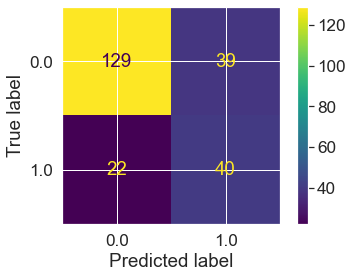

In [67]:
# 叫出圖式化confusion_matrix，確認 TP、TN、FN、FP
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

In [68]:
# 計算Precision, Recall, Accuracy
# I.手動計算
Precision = 40/(39+40)
Recall = 40/(22+40)
Accuracy = (129+40)/(129+39+22+40)
print("Precision=",Precision)
print("Recall=",Recall)
print("Accuracy=",Accuracy)

Precision= 0.5063291139240507
Recall= 0.6451612903225806
Accuracy= 0.7347826086956522


In [63]:
# 計算Precision, Recall, Accuracy
# II. 函式計算
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test,Y_prediction)
recall = recall_score(y_test,Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
print("precision=",precision)
print("recall=",recall)
print("accuracy=",accuracy)

precision= 0.5063291139240507
recall= 0.6451612903225806
accuracy= 0.7347826086956522


[Text(167.4, 190.26, 'X[6] <= 0.5\ngini = 0.459\nsamples = 687\nvalue = [442, 245]'),
 Text(83.7, 135.9, 'X[7] <= 0.5\ngini = 0.49\nsamples = 505\nvalue = [288, 217]'),
 Text(41.85, 81.53999999999999, 'X[23] <= 0.5\ngini = 0.5\nsamples = 347\nvalue = [170, 177]'),
 Text(20.925, 27.180000000000007, 'gini = 0.492\nsamples = 249\nvalue = [109, 140]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.47\nsamples = 98\nvalue = [61, 37]'),
 Text(125.55000000000001, 81.53999999999999, 'X[28] <= 0.5\ngini = 0.378\nsamples = 158\nvalue = [118, 40]'),
 Text(104.625, 27.180000000000007, 'gini = 0.34\nsamples = 143\nvalue = [112, 31]'),
 Text(146.475, 27.180000000000007, 'gini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(251.10000000000002, 135.9, 'X[14] <= 0.5\ngini = 0.26\nsamples = 182\nvalue = [154, 28]'),
 Text(209.25, 81.53999999999999, 'X[22] <= 0.5\ngini = 0.236\nsamples = 176\nvalue = [152, 24]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.212\nsamples = 166\nvalue = 

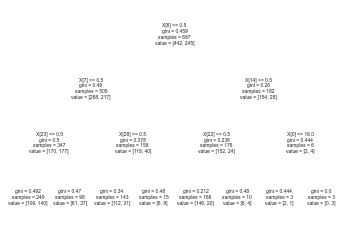

In [69]:
"""
5)產出決策樹的圖
"""
tree.plot_tree(clf)

In [75]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("clf") 

'clf.pdf'